## EXPLORATORY DATA ANALYSIS

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
weather_data_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
energy_data_1 = pd.read_csv('Plant_1_Generation_Data.csv')

Let's look at the column descriptions:

DATE_TIME: Date and time for each observation. Observations recorded at 15 minute intervals.

PLANT_ID: this will be common for the entire file

SOURCE_KEY: Source key in this file stands for the inverter id.

DC_POWER: Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

AC_POWER: Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

TOTAL_YIELD: This is the total yield for the inverter till that point in time.

In [3]:
weather_data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [4]:
energy_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
weather_data_1.shape

(3182, 6)

In [6]:
energy_data_1.shape

(68778, 7)

In [7]:
weather_data_1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [8]:
energy_data_1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [9]:
energy_data_1.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [10]:
weather_data_1['DATE_TIME'].nunique()

3182

In [11]:
energy_data_1['DATE_TIME'].nunique()

3158

### Merging the datasets

Our datasets come from a solar plant.
For solar plant we have two different datasets, one that describe the Energy generated from the plant at a given time, one that contains all the informations about the weather at the given time.
We will merge the data given the time, to have in the same row all the informations for a given date and time.

to merge the datasets, we have to convert the different formats of date_time, and merge the data given the timing of weather conditions and energy info:

In [12]:
weather_data_1['DATE_TIME'].head()

0    2020-05-15 00:00:00
1    2020-05-15 00:15:00
2    2020-05-15 00:30:00
3    2020-05-15 00:45:00
4    2020-05-15 01:00:00
Name: DATE_TIME, dtype: object

In [13]:
weather_data_1['DATE_TIME'] = pd.to_datetime(weather_data_1['DATE_TIME'], format= '%Y-%m-%d %H:%M:%S', errors='coerce')

In [14]:
energy_data_1['DATE_TIME'].head()

0    15-05-2020 00:00
1    15-05-2020 00:00
2    15-05-2020 00:00
3    15-05-2020 00:00
4    15-05-2020 00:00
Name: DATE_TIME, dtype: object

In [15]:

energy_data_1['DATE_TIME'] = pd.to_datetime(weather_data_1['DATE_TIME'], format= '%d-%m-%Y %H:%M:%S')
energy_data_1['DATE_TIME'] = energy_data_1['DATE_TIME'].dt.strftime('%Y/%m/%d %H:%M:%S')
energy_data_1['DATE_TIME'] = pd.to_datetime(weather_data_1['DATE_TIME'], format= '%Y-%m-%d %H:%M:%S')


#change format to merge the data

energy_data_1.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:15:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:30:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:45:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 01:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [16]:
energy_data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3182 non-null   datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [17]:
df = energy_data_1.merge(weather_data_1, on='DATE_TIME', how='inner')

In [18]:
df.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID_x           3182 non-null   int64         
 2   SOURCE_KEY_x         3182 non-null   object        
 3   DC_POWER             3182 non-null   float64       
 4   AC_POWER             3182 non-null   float64       
 5   DAILY_YIELD          3182 non-null   float64       
 6   TOTAL_YIELD          3182 non-null   float64       
 7   PLANT_ID_y           3182 non-null   int64         
 8   SOURCE_KEY_y         3182 non-null   object        
 9   AMBIENT_TEMPERATURE  3182 non-null   float64       
 10  MODULE_TEMPERATURE   3182 non-null   float64       
 11  IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 298.4+ KB


In [20]:
df.shape

(3182, 12)

In [21]:
df.isnull().sum()

DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

Now we have the full dataset, we can start to explore the features to select drop the ones we don't need

all the information regarding the Plant_id or source_id are not necessary, so we can drop it

In [22]:
df.drop(['PLANT_ID_x','SOURCE_KEY_x','PLANT_ID_y','SOURCE_KEY_y'],axis = 1, inplace=True)

In [23]:
df.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0,6183645.0,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0,6987759.0,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.0,7602960.0,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.0,7158964.0,24.621525,22.165423,0.0


In [24]:
df.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182,3182.000000,3182.000000,3182.000000,3.182000e+03,3182.000000,3182.000000,3182.000000
mean,2020-06-01 05:52:22.080452608,3472.789985,339.937481,2273.815932,6.858388e+06,25.531606,31.091015,0.228313
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,2020-05-23 22:48:45,0.000000,0.000000,0.000000,6.345776e+06,22.705182,21.090553,0.000000
50%,2020-06-01 09:52:30,2070.187500,202.950000,1172.750000,7.028673e+06,24.613814,24.618060,0.024653
75%,2020-06-09 16:56:15,6860.785714,671.932143,4787.107143,7.164239e+06,27.920532,41.307840,0.449588
max,2020-06-17 23:45:00,12319.142860,1201.442857,6471.000000,7.615074e+06,35.252486,65.545714,1.221652
std,NaN,3614.800767,353.625118,2443.960430,4.065266e+05,3.354856,12.261222,0.300836


<Axes: >

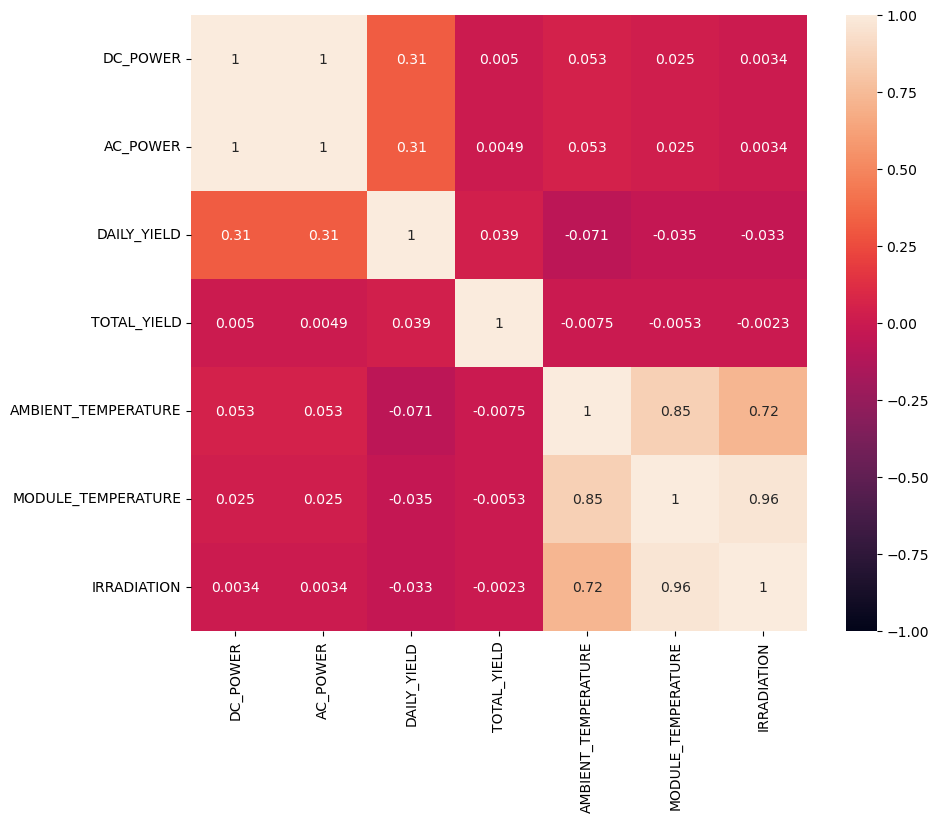

In [25]:
corr_matrix = df.loc[:, df.columns != 'DATE_TIME'].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,square = True, annot=True)

Given the correlation between AC_POWER and DC_POWER, justified by the fact that the DC_POWER is the AC_POWER converted by the inverted, we can drop one of this feature.

In [26]:
df.drop(['AC_POWER'],axis = 1, inplace=True)

The Total Yield is just a sum through time, we can drop this feature too.

In [27]:
df.drop(['TOTAL_YIELD'],axis = 1, inplace=True)

In [28]:
df.head()

,DATE_TIME,DC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,24.621525,22.165423,0.0


## Machine Learning Models

Import necessary librarys for the machine learning models to predict the energy production.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

### 1. Linear Regression

We need to split up the data into an X array that contains the features to train on and an y array with the target variable, in this case the DC_POWER.

In [30]:
X = df[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
y = df['DC_POWER']

##### Train Test Split
Now let's split the data into a training set and a testing set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

<Axes: xlabel='DC_POWER', ylabel='Count'>

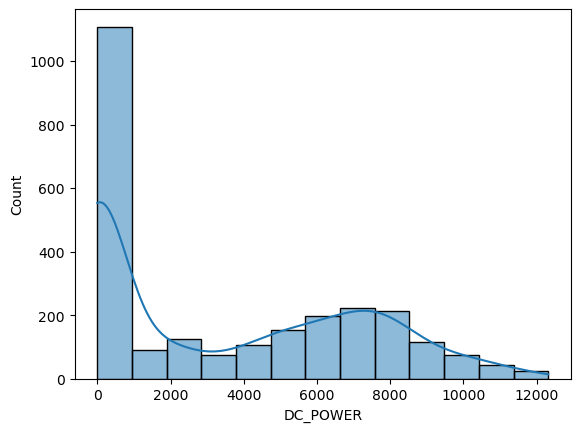

In [32]:
sns.histplot(y_train, kde=True)

<Axes: xlabel='DC_POWER', ylabel='Count'>

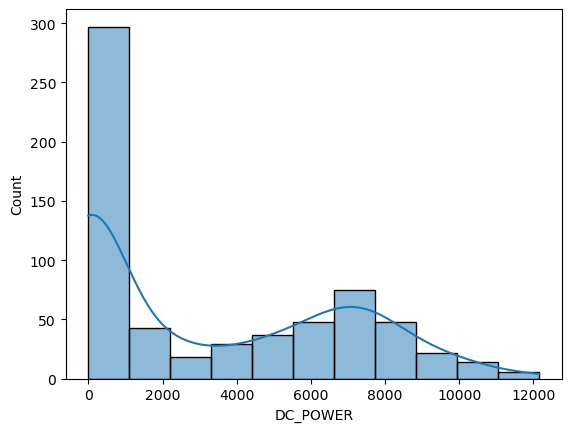

In [33]:
sns.histplot(y_test, kde=True)

Train a Linear Regression model

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

##### Coefficients

In [35]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
AMBIENT_TEMPERATURE,20.952607
MODULE_TEMPERATURE,73.461510
IRRADIATION,-3028.339496


These are the coefficients of the linear regression model for each feature. They represent the change in DC power for a one-unit change in the corresponding feature, assuming other features are constant.Interpreting the coefficients:
   - Holding all other features fixed, a 1 unit increase in 
       - AMBIENT_TEMPERATURE is associated with an "increase of 20,95"
       - MODULE_TEMPERATURE is associated with an "increase of 73,46"
       - IRRADIATION is associated with an "increase of -3028,34"

##### Predictions
Lets see the predictions from our model

In [36]:
predictions = lm.predict(X_test)

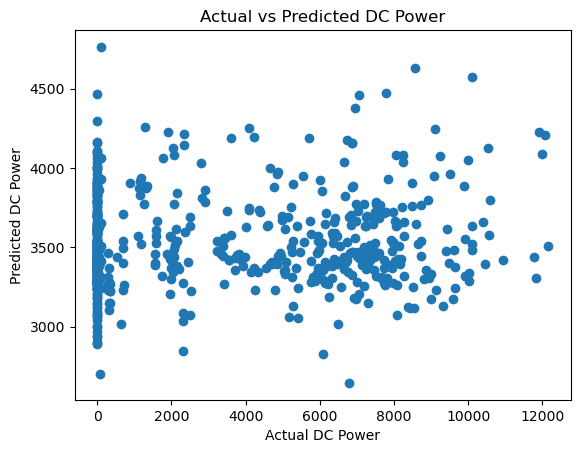

In [37]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.title('Actual vs Predicted DC Power')
plt.show()

<Axes: xlabel='DC_POWER', ylabel='Count'>

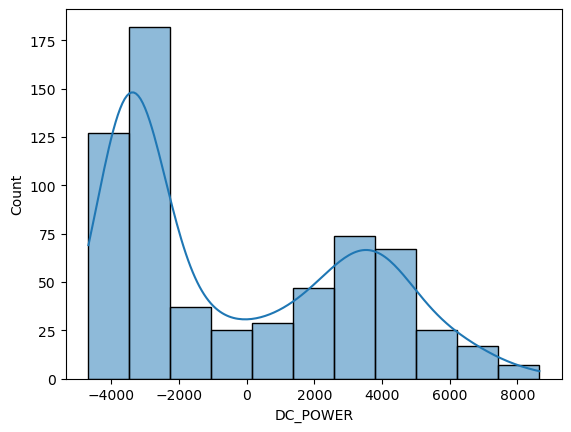

In [38]:
sns.histplot((y_test-predictions), kde=True)

##### Regression Evaluation Metrics
Evaluate the model using the metrics.

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3261.871599876777
MSE: 12530124.554666273
RMSE: 3539.7915976320237


The Mean Absolute Error (MAE) is a measure of the average absolute difference between the actual DC power values and the predicted values. In this case, the average absolute difference is 3261.

### 2. Random Forest Regression
Predicting the Energy Production

We need to split up the data into an X array that contains the features to train on and an y array with the target variable, in this case the DC_POWER.

In [40]:
X = df[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
y = df['DC_POWER']

##### Train Test Split
Now let's split the data into a training set and a testing set.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

Train a Random Forest Regression model.

In [42]:
rf = RandomForestRegressor(n_estimators=100, random_state=45)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=45)

##### Predictions
Lets see the predictions from our model

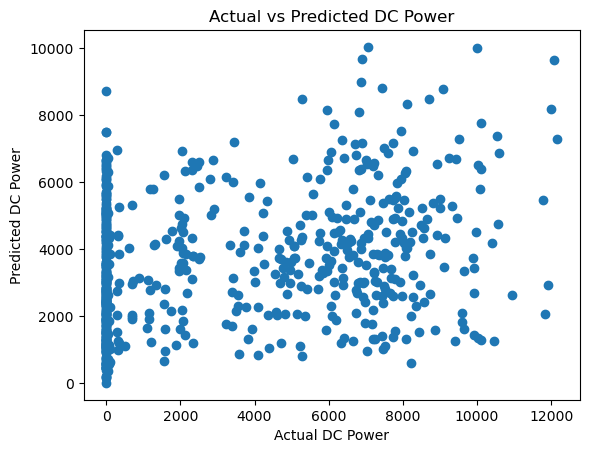

In [43]:
predictions = rf.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.title('Actual vs Predicted DC Power')
plt.show()

<Axes: xlabel='DC_POWER', ylabel='Count'>

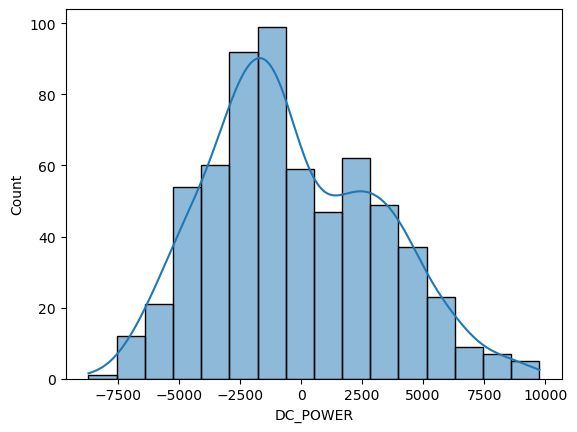

In [44]:
sns.histplot((y_test-predictions), kde=True)

##### Regression Evaluation Metrics
Evaluate the model using the metrics.

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2915.2180760989554
MSE: 12139278.197221765
RMSE: 3484.1466957092616


The Mean Absolute Error (MAE) is a measure of the average absolute difference between the actual DC power values and the predicted values. In this case, the average absolute difference is 2915.

### Results
The MAE from the Random Forest Regression is lower than the MAE from the Linear Regression Model.
This indicates a better performance for the Random Forest Regression Model.